# 0.) Import the US Perminent Visas using zip extractor

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
import zipfile

zf = zipfile.ZipFile("/content/gdrive/MyDrive/ECON 441B ML Lab/W5/us_perm_visas.csv.zip") 

# 1.) US perm Visas csv from cycle using zip extractor


In [5]:
df = pd.read_csv(zf.open('us_perm_visas.csv'), thousands=r',')
df

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374357,NaN,Buena Park,Law Offices of Yohan Lee,CA,NaN,NaN,A-16363-85407,2016-12-29,Withdrawn,NaN,...,NaN,NaN,N,NaN,28330.0,NaN,Year,NaN,NaN,NaN
374358,NaN,Seattle,MacDonald Hoague & Bayless,WA,NaN,NaN,A-16271-56745,2016-12-30,Withdrawn,L-1,...,NaN,Y,N,NaN,122000.0,142000.0,Year,NaN,NaN,NaN
374359,NaN,Schaumburg,International Legal and Business Services Grou...,IL,NaN,NaN,A-16354-82345,2016-12-30,Withdrawn,H-1B,...,NaN,NaN,N,NaN,79082.0,79082.0,Year,NaN,NaN,NaN
374360,NaN,LOS ANGELES,LAW OFFICES OF JAMES S HONG,CA,NaN,NaN,A-16357-84250,2016-12-30,Withdrawn,B-2,...,NaN,NaN,N,NaN,37981.0,NaN,Year,NaN,NaN,NaN


# 2.) Choose 4 features you think are important. Case_status is your target variable


I chose 'job_info_job_req_normal', 'job_info_education', 'job_info_experience', 'pw_amount_9089' as features. I also dropped 'Withdrawn' observations and regarded 'Certified-Expired' as 'Certified'

In [6]:
for i in df.columns:
  print(i)

add_these_pw_job_title_9089
agent_city
agent_firm_name
agent_state
application_type
case_no
case_number
case_received_date
case_status
class_of_admission
country_of_citizenship
country_of_citzenship
decision_date
employer_address_1
employer_address_2
employer_city
employer_country
employer_decl_info_title
employer_name
employer_num_employees
employer_phone
employer_phone_ext
employer_postal_code
employer_state
employer_yr_estab
foreign_worker_info_alt_edu_experience
foreign_worker_info_birth_country
foreign_worker_info_city
foreign_worker_info_education
foreign_worker_info_education_other
foreign_worker_info_inst
foreign_worker_info_major
foreign_worker_info_postal_code
foreign_worker_info_rel_occup_exp
foreign_worker_info_req_experience
foreign_worker_info_state
foreign_worker_info_training_comp
foreign_worker_ownership_interest
foreign_worker_yr_rel_edu_completed
fw_info_alt_edu_experience
fw_info_birth_country
fw_info_education_other
fw_info_postal_code
fw_info_rel_occup_exp
fw_info

In [7]:
df_select = df[['job_info_job_req_normal', 'job_info_education', 'job_info_experience', 'pw_amount_9089', 'case_status']]

# Category rearranging: Certified(=>Certified), Denied(=>Denied), Certified-Expired(=>Certified), Withdrawn(=>NaN)
df_select['case_status'][df_select['case_status']=='Withdrawn'] = np.NaN
df_select['case_status'][df_select['case_status']=='Certified-Expired'] = 'Certified'

df_select.dropna(inplace=True)
df_select

# country of citizenship has two columns mutually exclusive -> combine them into one column
# df_select['country_of_citizenship'].update(df_select['country_of_citzenship'])
# df_select.drop('country_of_citzenship', axis=1, inplace=True)


<ipython-input-7-822a5c1f0a2d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['case_status'][df_select['case_status']=='Withdrawn'] = np.NaN
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
<ipython-input-7-822a5c1f0a2d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['case_status'][df_select['case_status']=='Cert

,job_info_job_req_normal,job_info_education,job_info_experience,pw_amount_9089,case_status
135269,N,Bachelor's,N,83366.0,Certified
135270,Y,None,N,16973.0,Denied
135271,Y,Doctorate,Y,49982.0,Denied
135272,Y,Master's,N,43514.0,Certified
135273,Y,None,N,16973.0,Denied
...,...,...,...,...,...
374349,N,Bachelor's,N,84635.0,Certified
374350,N,Master's,N,69098.0,Certified
374351,N,Master's,Y,114795.0,Certified
374352,N,Master's,Y,112354.0,Certified


# 3.) Clean your data for a decision tree


In [8]:
# make dummies
X_dummy = pd.get_dummies(df_select[['job_info_job_req_normal','job_info_education','job_info_experience']])

# clean set
X = pd.concat([X_dummy, df_select['pw_amount_9089']], axis=1)
y = df_select['case_status']
X

,job_info_job_req_normal_N,job_info_job_req_normal_Y,job_info_education_Associate's,job_info_education_Bachelor's,job_info_education_Doctorate,job_info_education_High School,job_info_education_Master's,job_info_education_None,job_info_education_Other,job_info_experience_N,job_info_experience_Y,pw_amount_9089
135269,1,0,0,1,0,0,0,0,0,1,0,83366.0
135270,0,1,0,0,0,0,0,1,0,1,0,16973.0
135271,0,1,0,0,1,0,0,0,0,0,1,49982.0
135272,0,1,0,0,0,0,1,0,0,1,0,43514.0
135273,0,1,0,0,0,0,0,1,0,1,0,16973.0
...,...,...,...,...,...,...,...,...,...,...,...,...
374349,1,0,0,1,0,0,0,0,0,1,0,84635.0
374350,1,0,0,0,0,0,1,0,0,1,0,69098.0
374351,1,0,0,0,0,0,1,0,0,0,1,114795.0
374352,1,0,0,0,0,0,1,0,0,0,1,112354.0


In [9]:
y.unique()

array(['Certified', 'Denied'], dtype=object)

# 4.) Fit and plot a decision tree of depth 3


In [10]:
# Load libraries
from sklearn import tree
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X,y)

[Text(0.5, 0.875, 'pw_amount_9089 <= 47593.5\ngini = 0.104\nsamples = 229168\nvalue = [216532, 12636]'),
 Text(0.25, 0.625, 'pw_amount_9089 <= 34.58\ngini = 0.272\nsamples = 32142\nvalue = [26921, 5221]'),
 Text(0.125, 0.375, 'job_info_experience_N <= 0.5\ngini = 0.459\nsamples = 3619\nvalue = [2326, 1293]'),
 Text(0.0625, 0.125, 'gini = 0.486\nsamples = 931\nvalue = [387, 544]'),
 Text(0.1875, 0.125, 'gini = 0.402\nsamples = 2688\nvalue = [1939, 749]'),
 Text(0.375, 0.375, 'job_info_education_Doctorate <= 0.5\ngini = 0.237\nsamples = 28523\nvalue = [24595, 3928]'),
 Text(0.3125, 0.125, 'gini = 0.25\nsamples = 26530\nvalue = [22644, 3886]'),
 Text(0.4375, 0.125, 'gini = 0.041\nsamples = 1993\nvalue = [1951, 42]'),
 Text(0.75, 0.625, 'job_info_education_None <= 0.5\ngini = 0.072\nsamples = 197026\nvalue = [189611, 7415]'),
 Text(0.625, 0.375, 'job_info_job_req_normal_N <= 0.5\ngini = 0.068\nsamples = 193343\nvalue = [186541, 6802]'),
 Text(0.5625, 0.125, 'gini = 0.087\nsamples = 121523\

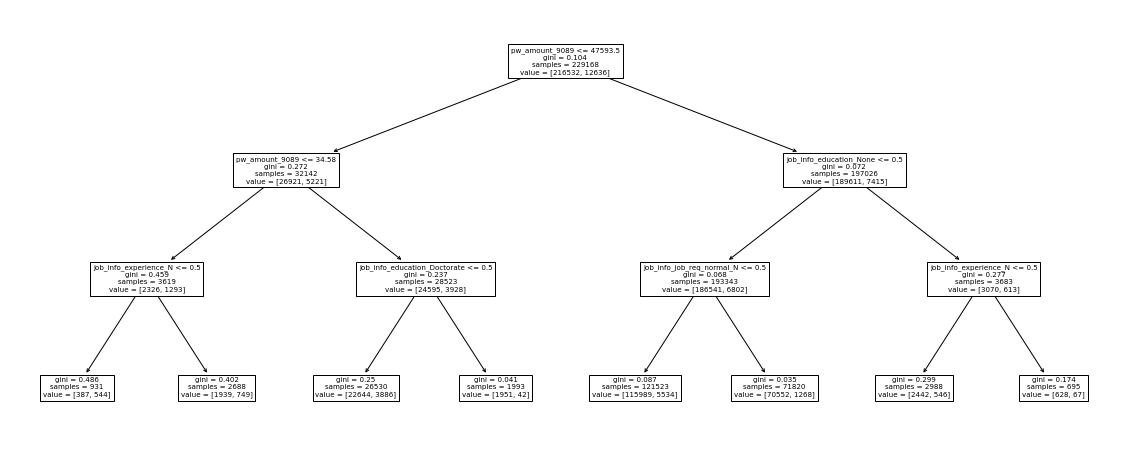

In [11]:
plt.figure(figsize = (20,8))
tree.plot_tree(clf, feature_names = X.columns)

# 5.) Write your interpretation of the largest (by sample size) leaf node


* The 6th leaf node has the largest sample size having 121,523. This node has cases that satisfy 1) pw_amount_9089 larger than 47593.5, 2) job_info_education_none as 0, 3) job_info_job_req_normal_N as 0 (job_req_normal as yes). We can see that 115,989, and 5,534 samples are categorized as 'Certified', and 'Denied' respectively in this node.
* The gini(=0.087) is quite small indicating this leaf node is pretty homogenous. 

# 6.) Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

Iterating from 1 through 20 for max_depth, depth = 13 had the highest accuracy of 0.9487.

In [12]:
# storage
outputs = pd.DataFrame(columns=['accuracy'])

# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

# max_depth
for md in range(1,21,1):
  clf = tree.DecisionTreeClassifier(max_depth=md).fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  outputs.loc[md] = metrics.accuracy_score(y_test, y_pred)
  # outputs.append(metrics.accuracy_score(y_test, y_pred))

outputs

,accuracy
1,0.944684
2,0.944684
3,0.945659
4,0.946037
5,0.946546
6,0.947172
7,0.947375
8,0.947943
9,0.947812
10,0.948263


In [13]:
outputs.max()

accuracy    0.948728
dtype: float64